In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from mpl_toolkits import mplot3d

In [4]:
import copy

In [5]:
file_path = "C:\Users\Divya Parmar's PC\Documents\Senate_Dimensions"

In [6]:
file_name = "\senator_score_dimensions_inbound.csv"

In [7]:
file_series = pd.Series([file_path, file_name])

In [8]:
df = pd.read_csv(file_series.str.cat())

In [9]:
df.head

<bound method DataFrame.head of              state             full_name        party  \
0          Alabama        Richard Shelby   Republican   
1          Alabama            Doug Jones   Democratic   
2           Alaska        Lisa Murkowski   Republican   
3           Alaska          Dan Sullivan   Republican   
4          Arizona        Kyrsten Sinema   Democratic   
5          Arizona        Martha McSally   Republican   
6         Arkansas          John Boozman   Republican   
7         Arkansas            Tom Cotton   Republican   
8       California      Dianne Feinstein   Democratic   
9       California         Kamala Harris   Democratic   
10        Colorado        Michael Bennet   Democratic   
11        Colorado          Cory Gardner   Republican   
12     Connecticut    Richard Blumenthal   Democratic   
13     Connecticut          Chris Murphy   Democratic   
14        Delaware            Tom Carper   Democratic   
15        Delaware           Chris Coons   Democratic   

In [10]:
df.shape

(100, 7)

In [11]:
df['state'][0]

'Alabama'

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df

,state,full_name,party,immigration_grade_numbersusa,immigration_score_numbersusa,aclu_score,club_for_growth_score
0,Alabama,Richard Shelby,Republican,F-,0.00,0.00,0.73
1,Alabama,Doug Jones,Democratic,F-,0.00,0.56,0.11
2,Alaska,Lisa Murkowski,Republican,F-,0.00,0.50,0.51
3,Alaska,Dan Sullivan,Republican,D,0.27,0.00,0.66
4,Arizona,Kyrsten Sinema,Democratic,F-,0.00,0.67,0.13
5,Arizona,Martha McSally,Republican,F-,0.01,0.00,0.57
6,Arkansas,John Boozman,Republican,D,0.23,0.00,0.69
7,Arkansas,Tom Cotton,Republican,A,0.92,0.11,0.82
8,California,Dianne Feinstein,Democratic,F-,0.00,1.00,0.06
9,California,Kamala Harris,Democratic,F-,0.03,1.00,0.13


In [14]:
df['immigration_score_progressive'] = 1 - df['immigration_score_numbersusa']

In [15]:
df['fiscal_score_progressive'] = 1 - df['club_for_growth_score']

In [16]:
df['social_score_progressive'] = df['aclu_score']

In [17]:
cols_to_drop = ['immigration_grade_numbersusa', 'immigration_score_numbersusa', 'aclu_score', 'club_for_growth_score']

In [18]:
df.drop(cols_to_drop, axis = 1, inplace=True)

In [19]:
df

,state,full_name,party,immigration_score_progressive,fiscal_score_progressive,social_score_progressive
0,Alabama,Richard Shelby,Republican,1.00,0.27,0.00
1,Alabama,Doug Jones,Democratic,1.00,0.89,0.56
2,Alaska,Lisa Murkowski,Republican,1.00,0.49,0.50
3,Alaska,Dan Sullivan,Republican,0.73,0.34,0.00
4,Arizona,Kyrsten Sinema,Democratic,1.00,0.87,0.67
5,Arizona,Martha McSally,Republican,0.99,0.43,0.00
6,Arkansas,John Boozman,Republican,0.77,0.31,0.00
7,Arkansas,Tom Cotton,Republican,0.08,0.18,0.11
8,California,Dianne Feinstein,Democratic,1.00,0.94,1.00
9,California,Kamala Harris,Democratic,0.97,0.87,1.00


In [20]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
#https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

In [21]:
party_labels = df['party'].tolist

In [22]:
#df['color'] = np.where(df['party'] == 'Republican', 'red', 'blue')
df['color'] = np.where(df['party'] == 'Republican', 'red', np.where(df['party'] == 'Democratic', 'blue', 'grey'))

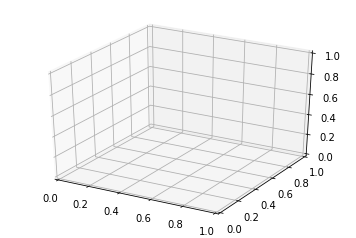

In [23]:
ax = plt.axes(projection='3d')

In [24]:
ax.scatter3D(df['fiscal_score_progressive'],df['social_score_progressive'], df['immigration_score_progressive'],
            c=df['color'])

In [25]:
ax.set_xlabel('fiscal')
ax.set_ylabel('social')
ax.set_zlabel('immigration')


Text(0.0937963,0.0125663,u'immigration')

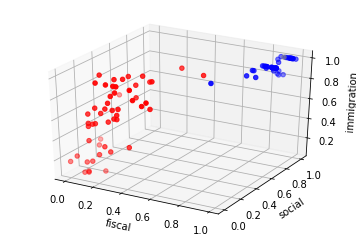

In [26]:
ax.figure

In [27]:
#https://benalexkeen.com/k-means-clustering-in-python/

In [28]:
#Recreating the k-means above in three dimensions
np.random.seed(949)

In [29]:
k=10

In [30]:
colmap = {1: 'blue', 2: 'red', 3: 'black', 4: 'green', 5: 'cyan',
         6: 'yellow', 7: 'white', 8: 'grey', 9: 'magenta', 10: 'darkolivegreen'}

In [31]:
centroids = {
    i+1 : [np.random.rand(), np.random.rand(), np.random.rand()]
    for i in range(k)
}

In [32]:
centroids

{1: [0.05250147042468811, 0.25200236401978826, 0.22447320963474182],
 2: [0.024749351677780584, 0.8569308777092204, 0.21552025807080843],
 3: [0.436466764706713, 0.6879805163547364, 0.9203863824797831],
 4: [0.7854218867629296, 0.3362116365816131, 0.00109288929204987],
 5: [0.7509326677446997, 0.623884826536509, 0.7681375330815201],
 6: [0.07248692982873406, 0.04488173484108171, 0.6201349300905715],
 7: [0.7236141082908408, 0.18930763999264844, 0.1539175624957907],
 8: [0.88652993037567, 0.16723775517616857, 0.4332030586401412],
 9: [0.63555642869738, 0.8431978853612802, 0.1633155868998647],
 10: [0.729331691240093, 0.48030217805307707, 0.37785349970734905]}

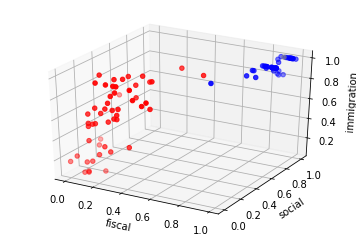

In [33]:
ax.figure

In [34]:
def assignment(df, centroids):
    for i in centroids.keys():
        #Euclidian distance
        df['distance_from_{}'.format(i)] = (
        np.sqrt(
            (df['fiscal_score_progressive'] - centroids[i][0]) ** 2 +
            (df['social_score_progressive'] - centroids[i][1]) ** 2 +
            (df['immigration_score_progressive'] - centroids[i][2]) ** 2
            )
        )
    #Create array of all centroid to point distances to get closest one to point
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    #Get closest centroid
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [35]:
assignment(df, centroids)

,state,full_name,party,immigration_score_progressive,fiscal_score_progressive,social_score_progressive,color,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,distance_from_6,distance_from_7,distance_from_8,distance_from_9,distance_from_10,closest
0,Alabama,Richard Shelby,Republican,1.00,0.27,0.00,yellow,0.843951,1.187387,0.712297,1.173249,0.821151,0.430492,0.978498,0.854012,1.242841,0.910353,6
1,Alabama,Doug Jones,Democratic,1.00,0.89,0.56,cyan,1.182247,1.205087,0.477922,1.028996,0.277815,1.038254,0.938591,0.689589,0.919230,0.647482,5
2,Alaska,Lisa Murkowski,Republican,1.00,0.49,0.50,black,0.924310,0.979421,0.211047,1.054474,0.370396,0.725084,0.931107,0.767610,0.915976,0.666884,3
3,Alaska,Dan Sullivan,Republican,0.73,0.34,0.00,yellow,0.633812,1.048047,0.720326,0.918011,0.748032,0.292657,0.717543,0.644012,1.058049,0.711531,6
4,Arizona,Kyrsten Sinema,Democratic,1.00,0.87,0.67,cyan,1.201860,1.168247,0.441149,1.056591,0.264696,1.082173,0.984047,0.757827,0.886003,0.665462,5
5,Arizona,Martha McSally,Republican,0.99,0.43,0.00,yellow,0.889967,1.224082,0.691524,1.103313,0.735835,0.516362,0.906135,0.739196,1.198601,0.833674,6
6,Arkansas,John Boozman,Republican,0.77,0.31,0.00,yellow,0.653766,1.059786,0.715491,0.964511,0.763975,0.284405,0.765814,0.688322,1.088593,0.748537,6
7,Arkansas,Tom Cotton,Republican,0.08,0.18,0.11,blue,0.239360,0.774838,1.051706,0.651102,1.031298,0.554568,0.554319,0.791968,0.867209,0.726365,1
8,California,Dianne Feinstein,Democratic,1.00,0.94,1.00,cyan,1.395921,1.213903,0.597696,1.209266,0.480593,1.345038,1.191596,1.008767,0.904054,0.837576,5
9,California,Kamala Harris,Democratic,0.97,0.87,1.00,cyan,1.335520,1.141997,0.536441,1.177518,0.443157,1.292549,1.159587,0.990917,0.854570,0.800319,5


In [36]:
df

,state,full_name,party,immigration_score_progressive,fiscal_score_progressive,social_score_progressive,color,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,distance_from_6,distance_from_7,distance_from_8,distance_from_9,distance_from_10,closest
0,Alabama,Richard Shelby,Republican,1.00,0.27,0.00,yellow,0.843951,1.187387,0.712297,1.173249,0.821151,0.430492,0.978498,0.854012,1.242841,0.910353,6
1,Alabama,Doug Jones,Democratic,1.00,0.89,0.56,cyan,1.182247,1.205087,0.477922,1.028996,0.277815,1.038254,0.938591,0.689589,0.919230,0.647482,5
2,Alaska,Lisa Murkowski,Republican,1.00,0.49,0.50,black,0.924310,0.979421,0.211047,1.054474,0.370396,0.725084,0.931107,0.767610,0.915976,0.666884,3
3,Alaska,Dan Sullivan,Republican,0.73,0.34,0.00,yellow,0.633812,1.048047,0.720326,0.918011,0.748032,0.292657,0.717543,0.644012,1.058049,0.711531,6
4,Arizona,Kyrsten Sinema,Democratic,1.00,0.87,0.67,cyan,1.201860,1.168247,0.441149,1.056591,0.264696,1.082173,0.984047,0.757827,0.886003,0.665462,5
5,Arizona,Martha McSally,Republican,0.99,0.43,0.00,yellow,0.889967,1.224082,0.691524,1.103313,0.735835,0.516362,0.906135,0.739196,1.198601,0.833674,6
6,Arkansas,John Boozman,Republican,0.77,0.31,0.00,yellow,0.653766,1.059786,0.715491,0.964511,0.763975,0.284405,0.765814,0.688322,1.088593,0.748537,6
7,Arkansas,Tom Cotton,Republican,0.08,0.18,0.11,blue,0.239360,0.774838,1.051706,0.651102,1.031298,0.554568,0.554319,0.791968,0.867209,0.726365,1
8,California,Dianne Feinstein,Democratic,1.00,0.94,1.00,cyan,1.395921,1.213903,0.597696,1.209266,0.480593,1.345038,1.191596,1.008767,0.904054,0.837576,5
9,California,Kamala Harris,Democratic,0.97,0.87,1.00,cyan,1.335520,1.141997,0.536441,1.177518,0.443157,1.292549,1.159587,0.990917,0.854570,0.800319,5


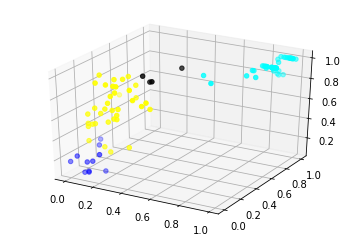

In [37]:
ax = plt.axes(projection='3d')
ax.scatter3D(df['fiscal_score_progressive'],df['social_score_progressive'], df['immigration_score_progressive'],
            c=df['color'])

In [38]:
old_centroids = copy.deepcopy(centroids)

In [39]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['fiscal_score_progressive'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['social_score_progressive'])
        centroids[i][2] = np.mean(df[df['closest'] == i]['immigration_score_progressive'])
    return k

In [40]:
centroids = update(centroids)

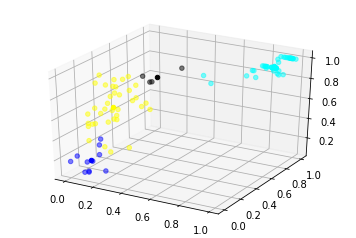

In [41]:
ax = plt.axes(projection='3d')
ax.scatter3D(df['fiscal_score_progressive'],df['social_score_progressive'], df['immigration_score_progressive'],
            c=df['color'], alpha=0.5)
for i in centroids.keys():
    ax.scatter3D(*centroids[i], c=colmap[i])

# NOT SURE HOW TO PLOT ARROW IN 3D
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
# from mplot3d import axes
# for i in old_centroids.keys():
#     old_x = old_centroids[i][0]
#     old_y = old_centroids[i][1]
#     old_z = old_centroids[i][2]
#     dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
#     dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
#     dz = (centroids[i][2] - old_centroids[i][2]) * 0.75
#     axes3D.quiver(old_x, old_y, old_z, dx, dy, dz)

In [42]:
df = assignment(df, centroids)

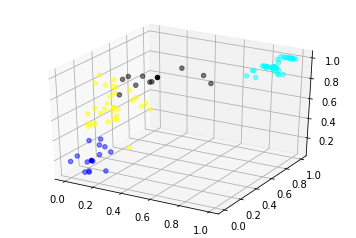

In [43]:
ax = plt.axes(projection='3d')
ax.scatter3D(df['fiscal_score_progressive'],df['social_score_progressive'], df['immigration_score_progressive'],
            c=df['color'], alpha=0.5)
for i in centroids.keys():
    ax.scatter3D(*centroids[i], c=colmap[i])

In [44]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

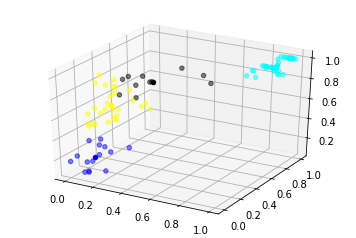

In [45]:
ax = plt.axes(projection='3d')
ax.scatter3D(df['fiscal_score_progressive'],df['social_score_progressive'], df['immigration_score_progressive'],
            c=df['color'], alpha=0.5)
for i in centroids.keys():
    ax.scatter3D(*centroids[i], c=colmap[i])

In [46]:
pd.set_option('display.max_colwidth', -1)

In [49]:
df.groupby('closest')['full_name'].apply(list)

closest
1    [Tom Cotton, David Perdue, Mike Braun, Bill Cassidy, John Kennedy, Josh Hawley, Ben Sasse, Jim Inhofe, Pat Toomey, Tim Scott, Mike Rounds, Marsha Blackburn, John Cornyn, Ted Cruz, Mike Lee]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
3    [Lisa Murkowski, Kelly Loeffler, Jerry Moran, Rand Paul, Susan Collins, Roger Wicker, Roy Blunt, Rob Portman, Lamar Alexander, Mitt Romney, Joe Manchin]                                                                                                                                                       

In [50]:
df.groupby('color')['full_name'].apply(list)

color
black     [Lisa Murkowski, Kelly Loeffler, Jerry Moran, Rand Paul, Susan Collins, Roger Wicker, Roy Blunt, Rob Portman, Lamar Alexander, Mitt Romney, Joe Manchin]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
blue      [Tom Cotton, David Perdue, Mike Braun, Bill Cassidy, John Kennedy, Josh Hawley, Ben Sasse, Jim Inhofe, Pat Toomey, Tim Scott, Mike Rounds, Marsha Blackburn, John Cornyn, Ted Cruz, Mike Lee]                                                                                                          